In [41]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [42]:
import pyspark

number_cores = 8
memory_gb = 24
conf = (
    pyspark.SparkConf()
        .setMaster('local[{}]'.format(number_cores))
        .set('spark.driver.memory', '{}g'.format(memory_gb))
)

In [43]:
import pyspark
import numpy as np
import pandas as pd

from pyspark.sql import SQLContext
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [44]:
sc = pyspark.SparkContext(conf=conf)
sqlContext = SQLContext(sc)

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[8]) created by __init__ at <ipython-input-4-ebd54013cbd1>:1 

In [94]:
# Load the Data

# amazon_reviews_dataset_sql_context = sqlContext.read.csv("/project/DE_Group_Project_2020/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv", header=True, sep=)
amazon_reviews_dataset_pd_df = pd.read_csv("/project/DE_Group_Project_2020/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
sparkDF = sqlContext.createDataFrame(amazon_reviews_dataset_pd_df)
# sparkRDD = sparkDF.rdd.map(list)

TypeError: field reviews.title: Can not merge type <class 'pyspark.sql.types.StringType'> and <class 'pyspark.sql.types.DoubleType'>

In [86]:
amazon_reviews_dataset_sql_context = amazon_reviews_dataset_sql_context.withColumnRenamed("reviews.title", "reviews_title")
amazon_reviews_dataset_sql_context = amazon_reviews_dataset_sql_context.withColumnRenamed("reviews.text", "reviews_text")
amazon_reviews_dataset_sql_context = amazon_reviews_dataset_sql_context.withColumnRenamed("reviews.rating", "reviews_rating")
amazon_reviews_dataset_sql_context.printSchema()

root
 |-- id: string (nullable = true)
 |-- dateAdded: string (nullable = true)
 |-- dateUpdated: string (nullable = true)
 |-- name: string (nullable = true)
 |-- asins: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- primaryCategories: string (nullable = true)
 |-- imageURLs: string (nullable = true)
 |-- keys: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- manufacturerNumber: string (nullable = true)
 |-- reviews.date: string (nullable = true)
 |-- reviews.dateAdded: string (nullable = true)
 |-- reviews.dateSeen: string (nullable = true)
 |-- reviews.doRecommend: string (nullable = true)
 |-- reviews.id: string (nullable = true)
 |-- reviews.numHelpful: string (nullable = true)
 |-- reviews_rating: string (nullable = true)
 |-- reviews.sourceURLs: string (nullable = true)
 |-- reviews_text: string (nullable = true)
 |-- reviews_title: string (nullable = true)
 |-- reviews.username: string (nulla

In [87]:
amazon_reviews_dataset_pd_df

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:06:48.451Z,2017-06-07T08:20:48.408Z",True,NaN,0,5,http://reviews.bestbuy.com/3545/5025900/review...,This is a great tablet for the price. Amazon i...,Good product,litle,"https://www.barcodable.com/upc/841667103150,ht..."
4996,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:07:00.236Z,2017-06-07T08:20:55.199Z",True,NaN,1,5,http://reviews.bestbuy.com/3545/5025900/review...,This table

In [88]:
amazon_reviews_dataset_sql_context.createOrReplaceTempView('amazon_reviews')
amazon_reviews_dataset_sql_context_reviewone = sqlContext.sql("SELECT name, asins,brand FROM amazon_reviews")
amazon_reviews_dataset_sql_context_reviewone.show(10)

+--------------------+-------+----------+
|                name|  asins|     brand|
+--------------------+-------+----------+
|"Amazon Kindle E-...| 2016)"|B00ZV9PXP2|
|"Amazon Kindle E-...| 2016)"|B00ZV9PXP2|
|"Amazon Kindle E-...| 2016)"|B00ZV9PXP2|
|"Amazon Kindle E-...| 2016)"|B00ZV9PXP2|
|"Amazon Kindle E-...| 2016)"|B00ZV9PXP2|
|"Amazon Kindle E-...| 2016)"|B00ZV9PXP2|
|"Amazon Kindle E-...| 2016)"|B00ZV9PXP2|
|"Amazon Kindle E-...| 2016)"|B00ZV9PXP2|
|"Amazon Kindle E-...| 2016)"|B00ZV9PXP2|
|"Amazon Kindle E-...| 2016)"|B00ZV9PXP2|
+--------------------+-------+----------+
only showing top 10 rows



In [26]:
amazon_reviews_dataset_sql_context_reviewone

DataFrame[id: string, dateAdded: string, dateUpdated: string, name: string, asins: string, brand: string, categories: string, primaryCategories: string, imageURLs: string, keys: string, manufacturer: string, manufacturerNumber: string, reviews.date: string, reviews.dateAdded: string, reviews.dateSeen: string, reviews.doRecommend: string, reviews.id: string, reviews.numHelpful: string, reviews.rating: string, reviews.sourceURLs: string, reviews.text: string, reviews.title: string, reviews.username: string, sourceURLs: string]

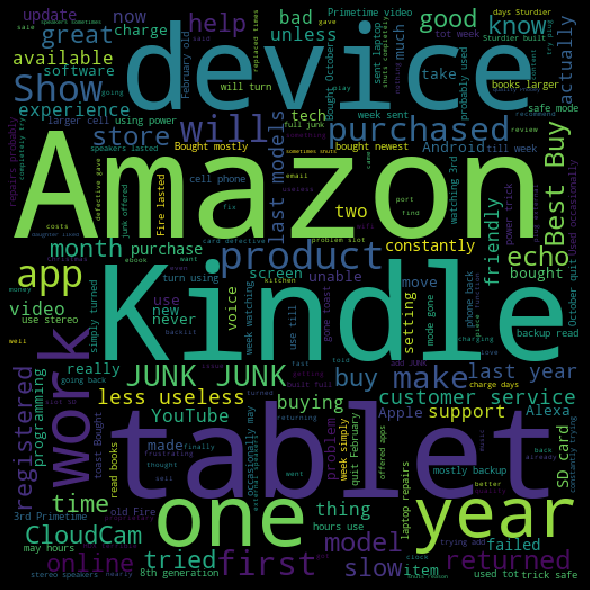

In [17]:
# Visualise the 5 different reviews WordCloud and figure other ways to quantify frequency of words
# From - https://towardsdatascience.com/spam-classifier-in-python-from-scratch-27a98ddd8e73

# WorldCloud - Review == 1 
reviewone = ' '.join(list(amazon_reviews_dataset_pd_df[amazon_reviews_dataset_pd_df['reviews.rating']==1]['reviews.text']))
reviewone_wc = WordCloud(width=512,height=512).generate(reviewone)

plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(reviewone_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [18]:
# Set voting values.
RATINGONE = 0
RATINGTWO = 1 
RATINGTHREE = 2
RATINGFOUR = 3
RATINGFIVE = 4

ABSTAIN = -1

In [ ]:
from textblob import TextBlob 
from snorkel.preprocess import preprocessor

# Common good words 
GOOD = r"\bjew (love|great|good|easy|happy|nice|fun|pretty|works|better|well|ok)"
BAD = r"\bjew (old|junk|useless|failded|slow|nothing)"

# labelling functions for five different rating tiers 
def good(x):
  if re.search(GOOD, x) else ABSTAIN
     return RATINGTHREE if TextBlob() else ABSTAIN
     return RATINGFOUR if  else ABSTAIN
     return RATINGFIVE if  else ABSTAIN
  if re.search(BAD, x) else ABSTAIN
     return RATINGTWO if  else ABSTAIN
     return RATINGTHRE if  else ABSTAIN